In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\

In [2]:
plt.style.use('seaborn')

# Generate Data

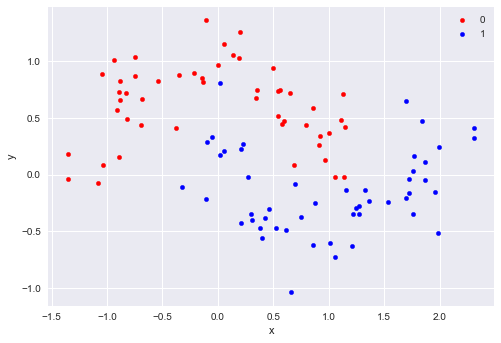

In [4]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot
df = pd.DataFrame(dict(x=X[:, 0 ], y=X[:,1], label=y))
colors = {0:'red',1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

In [5]:
# split into train dan test
n_train = 30
trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

# Create simple MLP model

In [18]:
def init_model():
    
    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    
    return model

# Train Model

In [19]:
# init model
model = init_model()

In [20]:
history = model.fit(trainX,trainy,validation_data=(validX,validy), epochs=500, verbose=0)

In [21]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, valid: %.3f' % (train_acc,valid_acc))

Train: 0.967, valid: 0.871


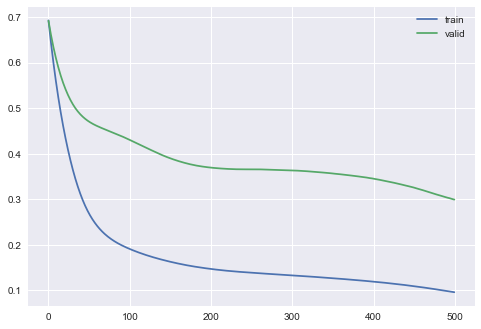

In [22]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# Train Model (More epoch)

In [23]:
# init model
model = init_model()

In [24]:
history = model.fit(trainX,trainy,validation_data=(validX,validy), epochs=4000, verbose=0)

In [25]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, valid: %.3f' % (train_acc,valid_acc))

Train: 1.000, valid: 0.914


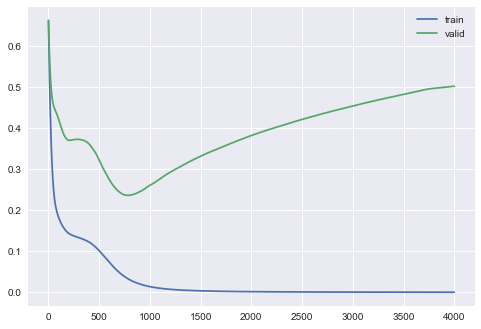

In [26]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# Train Model (Overfit with Early Stopping)

In [27]:
# init model
model = init_model()

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [32]:
history = model.fit(trainX,trainy,validation_data=(validX,validy), epochs=4000, verbose=0 , callbacks=[es])

Epoch 00214: early stopping


In [33]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, valid: %.3f' % (train_acc,valid_acc))

Train: 0.967, valid: 0.814


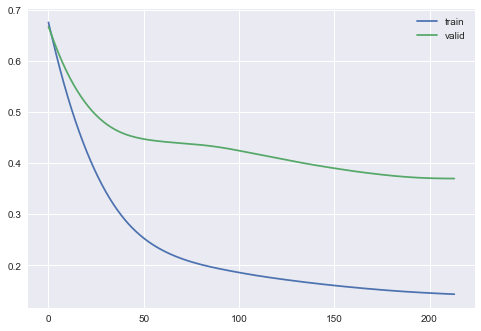

In [34]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# Train model (overfit with erlystopping, patience)

In [35]:
# init model
model = init_model()

In [36]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [37]:
history = model.fit(trainX,trainy,validation_data=(validX,validy), epochs=4000, verbose=0 , callbacks=[es])

Epoch 01004: early stopping


In [38]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, valid: %.3f' % (train_acc,valid_acc))

Train: 1.000, valid: 0.943


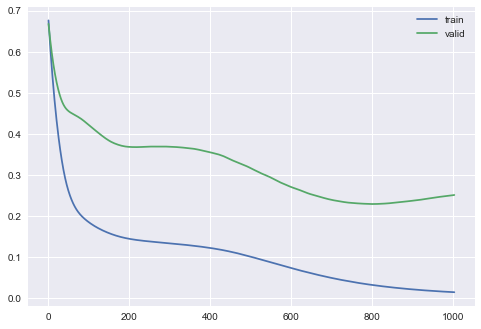

In [39]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# Train model (overfit with early stopping, patience, model checkpoint)

In [40]:
# init model
model = init_model()

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [42]:
mc = ModelCheckpoint('best_model.h5',monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [43]:
history = model.fit(trainX,trainy,validation_data=(validX,validy), epochs=4000, verbose=0 , callbacks=[es , mc])

C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 01031: early stopping


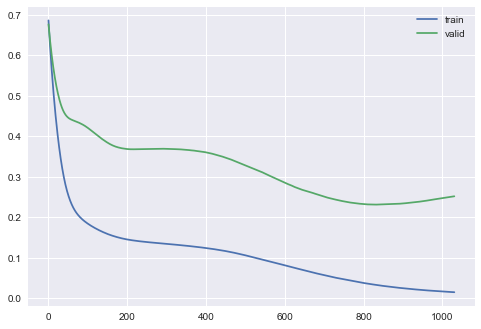

In [44]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()